In [1]:
#импортируем все необходимые библиотеки

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [12]:
#проверим признаки на корреляцию и исключим признаки, 
#имеющие корреляцию с другими более чем 0.7 по модулю
#и имеющие корреляцию со столбиком стостояние менее 0.1 по модулю

file = pd.read_excel('Общая таблица.xlsx')
file.corr()


,Номер гильзы,Вид,"Количество заготовок, шт.:","Вес заготовок, т:","Вес разлитой стали, т:","Температура стали, °C:","Частота качания, кол-во/мин","Ход кр-ра, мм","Скорость разливки, м/мин","Расход воды на кр-р, л/мин",...,"Расход воды ЗВО №1, л/мин","Расход воды ЗВО №2, л/мин","Расход воды ЗВО №3, л/мин","Темп. 1, °С","Темп. 2, °С","Темп. 3, °С",Кол-во НЛЗ,"Вес НЛЗ, т",Состояние,Среднее
Номер гильзы,1.000000,0.392488,-0.369002,0.031507,-0.174479,-0.178345,0.395663,-0.126815,-0.268141,0.147038,...,0.112924,-0.051821,-0.395734,-0.120876,-0.227885,-0.208039,-0.369002,0.031507,0.149366,-0.199629
Вид,0.392488,1.000000,-0.953511,0.059507,-0.116631,-0.321587,0.439337,-0.239732,-0.931981,0.266483,...,0.017575,-0.502700,-0.809994,-0.056695,-0.172123,-0.157387,-0.953511,0.059507,0.301798,-0.128490
"Количество заготовок, шт.:",-0.369002,-0.953511,1.000000,0.235729,0.289382,0.265649,-0.409141,0.235532,0.901408,-0.255494,...,-0.026354,0.492573,0.782425,0.010097,0.123633,0.114135,1.000000,0.235729,-0.287320,0.073376
"Вес заготовок, т:",0.031507,0.059507,0.235729,1.000000,0.581070,-0.140665,0.034538,0.011003,-0.019958,0.011450,...,-0.041182,0.006746,-0.016839,-0.157795,-0.135984,-0.122661,0.235729,1.000000,0.007966,-0.170435
"Вес разлитой стали, т:",-0.174479,-0.116631,0.289382,0.581070,1.000000,-0.029524,-0.090390,0.094560,0.128848,-0.041562,...,-0.056150,0.035944,0.095771,0.013573,-0.047786,-0.061975,0.289382,0.581070,-0.055801,-0.020459
"Температура стали, °C:",-0.178345,-0.321587,0.265649,-0.140665,-0.029524,1.000000,-0.253310,0.062780,0.214180,-0.053280,...,-0.011234,0.057865,0.197389,0.225224,0.474259,0.476009,0.265649,-0.140665,-0.189330,0.409569
"Частота качания, кол-во/мин",0.395663,0.439337,-0.409141,0.034538,-0.090390,-0.253310,1.000000,-0.363560,-0.327580,0.141270,...,0.039531,-0.103649,-0.331293,-0.018548,-0.055579,-0.025947,-0.409141,0.034538,0.378232,-0.036239
"Ход кр-ра, мм",-0.126815,-0.239732,0.235532,0.011003,0.094560,0.062780,-0.363560,1.000000,0.261873,-0.076954,...,0.012268,0.142106,0.177049,0.002779,0.009415,-0.017861,0.235532,0.011003,-0.080161,-0.001000
"Скорость разливки, м/мин",-0.268141,-0.931981,0.901408,-0.019958,0.128848,0.214180,-0.327580,0.261873,1.000000,-0.249564,...,0.046015,0.615134,0.816481,0.026449,0.143747,0.137928,0.901408,-0.019958,-0.216042,0.094819
"Расход воды на кр-р, л/мин",0.147038,0.266483,-0.255494,0.011450,-0.041562,-0.053280,0.141270,-0.076954,-0.249564,1.000000,...,0.003148,-0.143131,-0.224619,-0.008555,-0.029621,-0.030640,-0.255494,0.011450,0.087549,-0.022998


Text(0, 0.5, 'Значение корреляции')

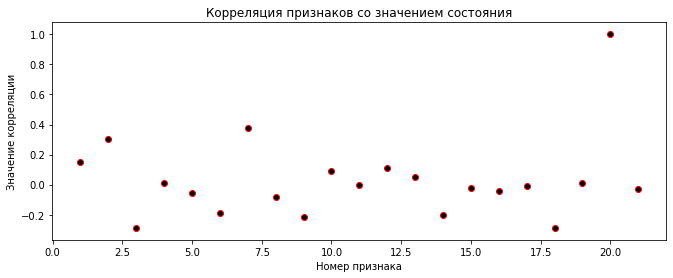

In [38]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(11, 4))
 
ax1.scatter(x=range(1, 22), y=file.corr()['Состояние'], marker='o', c='black', edgecolor='r')
ax1.set_title('Корреляция признаков со значением состояния')
ax1.set_xlabel('Номер признака')
ax1.set_ylabel('Значение корреляции')

In [39]:
train_data = file[['Номер гильзы', 'Вид', 'Количество заготовок, шт.:',
       'Температура стали, °C:', 'Частота качания, кол-во/мин',
        'Ход кр-ра, мм', 'Скорость разливки, м/мин',
        'Расход воды на кр-р, л/мин', 'Дельта температуры воды, С',
        'Расход воды ЗВО №1, л/мин', 'Расход воды ЗВО №2, л/мин',
        'Расход воды ЗВО №3, л/мин', 'Темп. 2, °С']]

label_data = file[['Состояние']]

In [40]:
#разделим данные на обущающую выборку - 60% и тестовую выборку - 40%

X_train, X_test, y_train, y_test = train_test_split(train_data, label_data, 
                                                    train_size=0.6,
                                                    test_size=0.4, 
                                                    shuffle=True,
                                                   random_state=18)

In [41]:
#переведём данные в тип массива NumPy и заменим отсутствующие значения на 0

X_train_np = np.array(X_train.fillna(0))
X_test_np = np.array(X_test.fillna(0))

y_train_np = np.array(y_train).astype(np.float64)
y_test_np = np.array(y_test).astype(np.float64)

In [42]:
#отстандантизируем данные

scaler = StandardScaler()
scaler.fit(X_train_np, y_train_np)

X = scaler.transform(X_train_np)
X_t = scaler.transform(X_test_np)

In [43]:
#обучим модель k-ближайжих соседей

knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=15, p=1, leaf_size = 15, algorithm='brute')
knn.fit(X, y_train_np)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='brute', leaf_size=15, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=15, p=1,
                     weights='uniform')

In [44]:
predictions = knn.predict(X_t)

In [48]:
#вычислим точность нашей модели, вычислив метрику между значениями в таблице
#и предсказаниями классификатора

print('Точность предсказания показателя для детали: {} %'.format((accuracy_score(y_test_np, predictions)*100).round(3)))

Точность предсказания показателя для детали: 75.321 %


In [49]:
'''

Вам потребуется ввести следующие данные о гильзе в массив data, чтобы получить результативный показатель для данной гильзы:
1. Номер гильзы
2. Вид
3. Количество заготовок, шт.:
4. Температура стали, °C:
5. Частота качания, кол-во/мин
6. Ход кр-ра, мм
7. Скорость разливки, м/мин
8. Расход воды на кр-р, л/мин
9. Дельта температуры воды, С
10.Расход воды ЗВО №1, л/мин
11.Расход воды ЗВО №2, л/мин
12.Расход воды ЗВО №3, л/мин
13.Темп. 2, °С

'''

data = [[30012283, 180, 47, 1589.00, 165, 7, 2.10, 2155, 8.3,
         250, 280, 90, 1557]]
x = scaler.transform(data)
prediction = knn.predict(x)

'''
Для запуска нажмите shift+enter
'''
print(prediction)

[1.]
